In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import mySigmoid,load_dataset

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

[[[[ 17  31  56]
   [ 22  33  59]
   [ 25  35  62]
   ...
   [  1  28  57]
   [  1  26  56]
   [  1  22  51]]

  [[ 25  36  62]
   [ 28  38  64]
   [ 30  40  67]
   ...
   [  1  27  56]
   [  1  25  55]
   [  2  21  51]]

  [[ 32  40  67]
   [ 34  42  69]
   [ 35  42  70]
   ...
   [  1  25  55]
   [  0  24  54]
   [  1  21  51]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[196 192 190]
   [193 186 182]
   [188 179 174]
   ...
   [ 90 142 200]
   [ 90 142 201]
   [ 90 142 201]]

  [[230 229 229]
   [204 199 197]
   [193 186 181]
   ...
   [ 91 143 201]
   [ 91 143 201]
   [ 91 143 201]]

  [[232 225 224]
   [235 234 234]
   [208 205 202]
   ...
   [ 91 144 202]
   [ 91 144 202]
   [ 92 144

Example data

y = 0, it's a 'non-cat' picture.


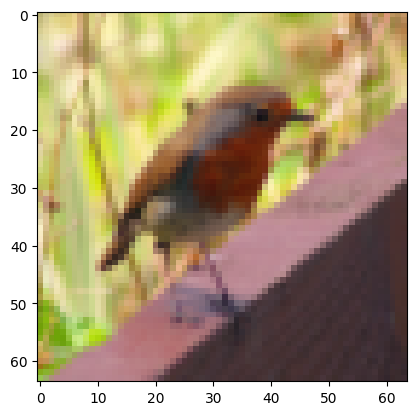

In [3]:
index = 10
plt.imshow(train_set_x_orig[index])
label_of_image = classes[np.squeeze(train_set_y[:, index])].decode("utf-8")
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + label_of_image +  "' picture.")

**Training and Test samples**

In [4]:
m_train = train_set_x_orig.shape[0] ## shape =  (number of images, height, width, number of colours)
m_test = test_set_x_orig.shape[0]
num_px = test_set_x_orig.shape[1]
m_train, m_test, num_px

(209, 50, 64)

**Pre-processing of the samples**:-
* flattening --> reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px * num_px * 3, 1)
* Normalization

In [5]:
train_set_x_flatten = train_set_x_orig.reshape(m_train, num_px * num_px * 3).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T # shortcut
print(train_set_x_flatten.shape, test_set_x_flatten.shape)

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
print(train_set_x.shape, test_set_x.shape)
print("Y : ",train_set_y.shape, test_set_y.shape)

(12288, 209) (12288, 50)
(12288, 209) (12288, 50)
Y :  (1, 209) (1, 50)


**Architecture of Learning Algorithm**
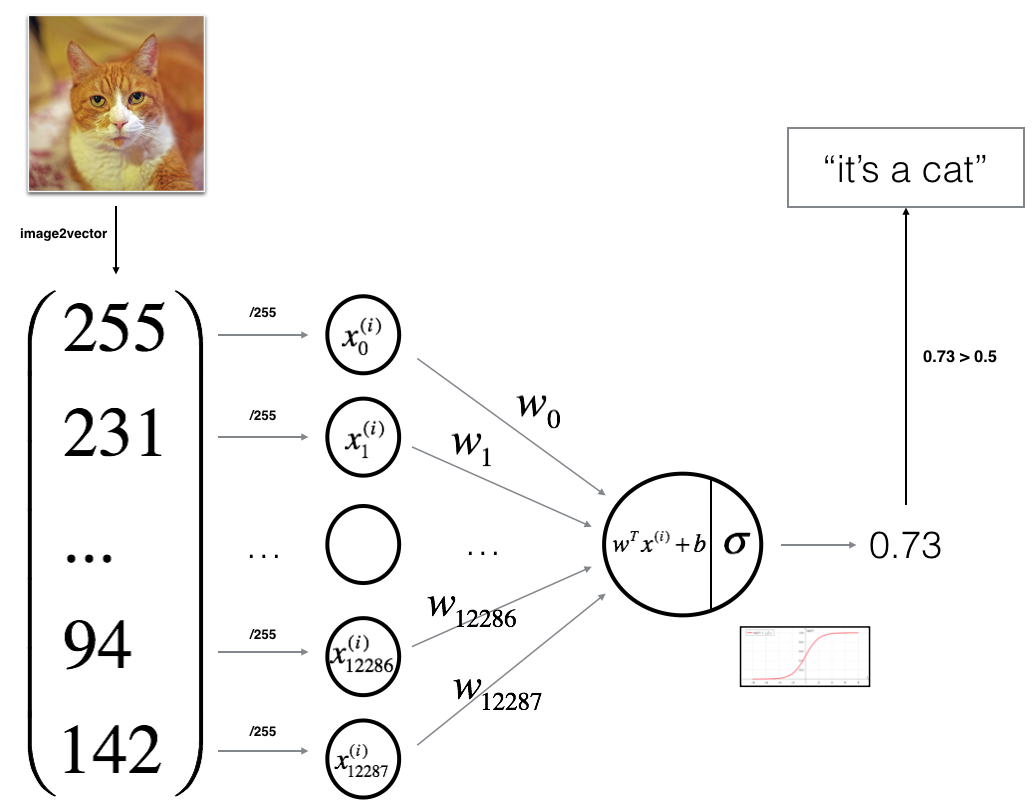

In [6]:
mySigmoid(np.array([0,2]))

array([0.5       , 0.88079708])

**Building the neural network**
- Initialize Parameters
- Forward and backward propagation
- Optimization

In [7]:
def initialize_with_zeros(dim): ## dim --> dimension of features in "w"
    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim,1))

    return w,b

dim = 2
w,b = initialize_with_zeros(dim)
w,b

(array([[0.],
        [0.]]),
 0)

In [8]:
def propagate(w,b,X, Y):
    ## Forward Prop
    m = X.shape[1] ## number of samples
    Z = np.dot(w.T, X) + b
    A = mySigmoid(Z)
    cost = np.sum((np.log(A)*Y + (1-Y)*(np.log(1-A))))/m 
    cost *= -1

    ## Backward Prop
    dZ = A - Y
    dw = np.dot(X, dZ.T)/m
    db = np.sum(dZ)/m 

    ## Validations
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,"db": db}
    return grads, cost

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


# Optimization
We will now optimize the parameters(w,b) using a learninig rate with the aim of reduction in cost function(J)

In [9]:
def optimize(w,b,X, Y, num_iterations, learning_rate , print_cost = False):
    """
    Optimization using the gradient descent algorithm
    """
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w,b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)

        if i%100 == 0:
            costs.append(cost)
        
        if print_cost and i%100 == 0:
            print("Cost after iteration %i: %f", (i, cost))

    
    params = {"w": w, "b": b}

    grads = {"dw": dw, "db": db}

    return params, grads, costs

In [10]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


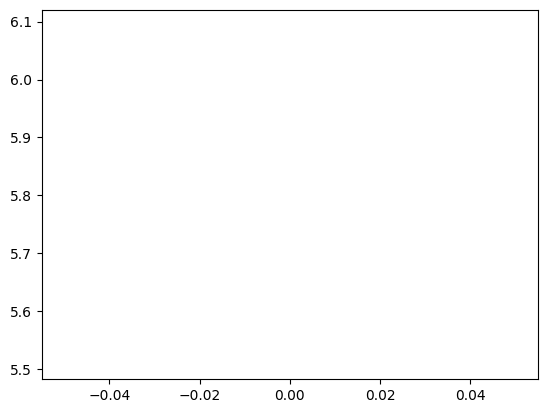

In [11]:
plt.plot(costs)

# Prediction
Based on the previous helper functions, we would like to predict

In [12]:
def predict(w,b,X) : 
    '''Predict label as 0 or 1 using logsitic regression and gradient descent'''
    m = X.shape[1] ## x.shape --> (number of labels, number of samples)
    # print("M = ",m)
    # print("X shape : ", X.shape)
    Y_hat = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    # print("w = ",w.shape)
    A = mySigmoid(np.dot(w.T, X) + b)

    Y_hat = (A >= 0.5) * 1.0

    assert(Y_hat.shape == (1,m))

    return Y_hat

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


# Model
Using the above parts, we now build a model

In [13]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate = 0.5, print_cost = False):

    ## Initialize params
    w,b = initialize_with_zeros(X_train.shape[0])

    ## Gradient descent
    parameters, grads, costs = optimize(w,b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    ## Retrieve params
    w = parameters["w"]
    b = parameters["b"]

    ## Prediction
    Y_hat_test = predict(w,b,X_test)
    Y_hat_train = predict(w,b,X_train)

    ## Accuracy
    print("Train accuracy : {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train))*100) )
    print("Tests accuracy : {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test))*100) )

    ## Final data
    d = {
        "costs" : costs,
        "Y_prediction_train" : Y_hat_train,
        "Y_prediction_test" : Y_hat_test,
        "Weigts" : w,
        "Bias" : b,
        "learning_rate" : learning_rate,
        "num_iterations" : num_iterations
    }
    return d

In [14]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

Train accuracy : 99.04306220095694 %
Tests accuracy : 70.0 %


# Extra
## Wrongly classfied example

y = 1, you predicted that it is a non-cat


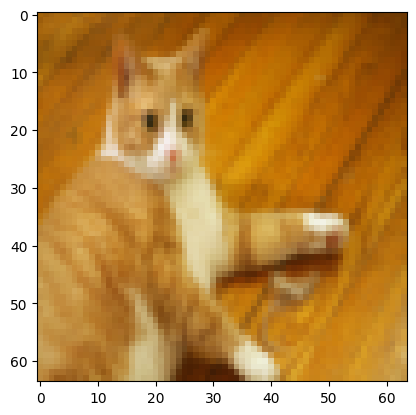

In [15]:
# Example of a picture that was wrongly classified.
index = 19
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
binary_prediction = int(d["Y_prediction_test"][0,index])
print ("y = " + str(test_set_y[0,index]) +  ", you predicted that it is a " + classes[binary_prediction].decode("utf-8"))


## Costs Graph

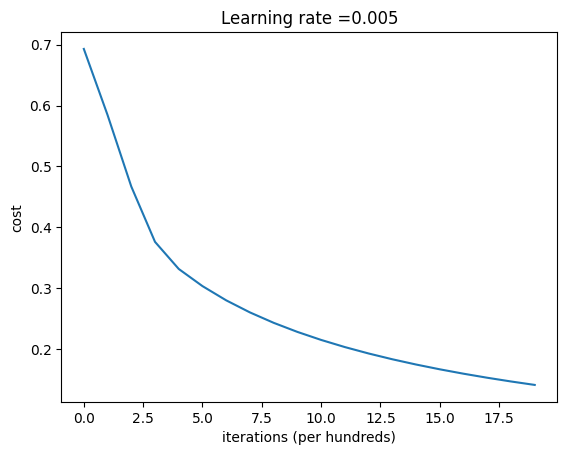

In [16]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()